## Connect to Couchbase Cluster

In [1]:
from couchbase.cluster import Cluster, ClusterOptions, QueryOptions
from couchbase_core.cluster import PasswordAuthenticator
from couchbase.exceptions import CouchbaseException
pa = PasswordAuthenticator("Administrator", "123456")
cluster = Cluster("couchbase://127.0.0.1", ClusterOptions(pa))
bucket = cluster.bucket("TestBucket")
collection = bucket.default_collection()

## Imports for libraries

In [2]:
import math
import warnings
warnings.filterwarnings("ignore")
import matplotlib as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

## Fetch Data from Couchbase Cluster

In [3]:
result = cluster.query(
    "SELECT Newspaper,Radio,Sales,TV FROM `TestBucket`", QueryOptions(metrics=True)
)
data = [row for row in result.rows()]
df = pd.DataFrame(data)

## Data Exploration

In [4]:
df.describe()

,Newspaper,Radio,Sales,TV
count,200.000000,200.000000,200.000000,200.000000
mean,30.554000,23.264000,15.130500,147.042500
std,21.778621,14.846809,5.283892,85.854236
min,0.300000,0.000000,1.600000,0.700000
25%,12.750000,9.975000,11.000000,74.375000
50%,25.750000,22.900000,16.000000,149.750000
75%,45.100000,36.525000,19.050000,218.825000
max,114.000000,49.600000,27.000000,296.400000


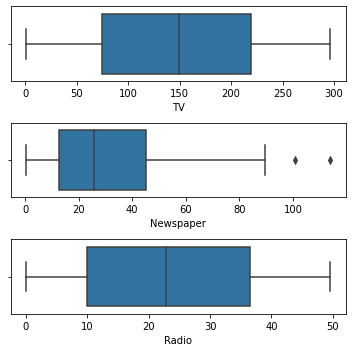

In [5]:
fig, axs = plt.pyplot.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(df["TV"], ax=axs[0])
plt2 = sns.boxplot(df["Newspaper"], ax=axs[1])
plt3 = sns.boxplot(df["Radio"], ax=axs[2])
plt.pyplot.tight_layout()

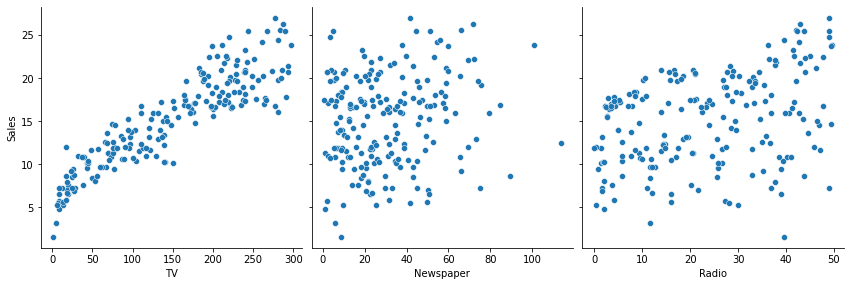

In [6]:
sns.pairplot(
    df, x_vars=["TV", "Newspaper", "Radio"], y_vars="Sales", height=4, aspect=1
)
plt.pyplot.show()

## Train Model using Ordinary Least Squares (OLS) Linear Regression

In [7]:
X = df["TV"]
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.6, test_size=0.4, random_state=100
)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     549.3
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           3.26e-46
Time:                        16:50:49   Log-Likelihood:                -266.36
No. Observations:                 120   AIC:                             536.7
Df Residuals:                     118   BIC:                             542.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1112      0.391     18.174      0.0

## Prediction from Trained Model

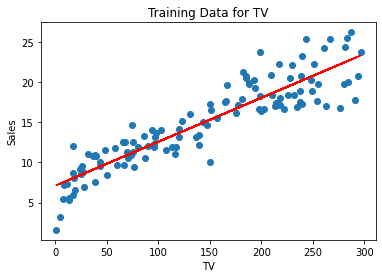

In [8]:
plt.pyplot.scatter(X_train, y_train)
plt.pyplot.plot(X_train, lr.params[0] + lr.params[1] * X_train, "r")
plt.pyplot.xlabel("TV")
plt.pyplot.ylabel("Sales")
plt.pyplot.title("Training Data for TV")
plt.pyplot.show()

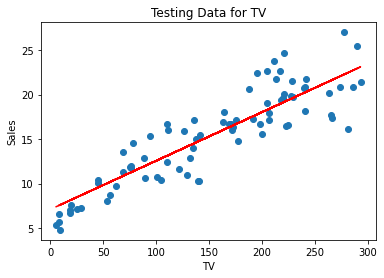

In [9]:
plt.pyplot.scatter(X_test, y_test)
plt.pyplot.plot(X_test, lr.params[0] + lr.params[1] * X_test, "r")
plt.pyplot.xlabel("TV")
plt.pyplot.ylabel("Sales")
plt.pyplot.title("Testing Data for TV")
plt.pyplot.show()

## Train & Test Models using other Categorical Variables

In [10]:
X = df["Radio"]
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.6, test_size=0.4, random_state=100
)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     9.538
Date:                Mon, 06 Sep 2021   Prob (F-statistic):            0.00251
Time:                        16:50:50   Log-Likelihood:                -365.65
No. Observations:                 120   AIC:                             735.3
Df Residuals:                     118   BIC:                             740.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5830      0.891     14.127      0.0

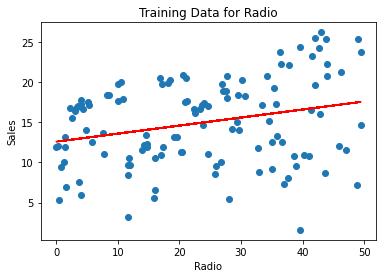

In [11]:
plt.pyplot.scatter(X_train, y_train)
plt.pyplot.plot(X_train, lr.params[0] + lr.params[1] * X_train, "r")
plt.pyplot.xlabel("Radio")
plt.pyplot.ylabel("Sales")
plt.pyplot.title("Training Data for Radio")
plt.pyplot.show()

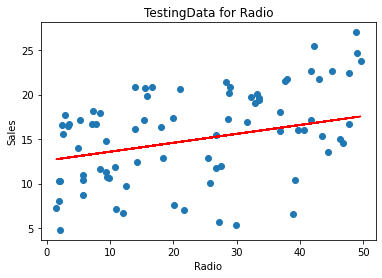

In [12]:
plt.pyplot.scatter(X_test, y_test)
plt.pyplot.plot(X_test, lr.params[0] + lr.params[1] * X_test, "r")
plt.pyplot.xlabel("Radio")
plt.pyplot.ylabel("Sales")
plt.pyplot.title("TestingData for Radio")
plt.pyplot.show()

In [13]:
X = df["Newspaper"]
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.6, test_size=0.4, random_state=100
)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.445
Date:                Mon, 06 Sep 2021   Prob (F-statistic):              0.121
Time:                        16:50:50   Log-Likelihood:                -369.09
No. Observations:                 120   AIC:                             742.2
Df Residuals:                     118   BIC:                             747.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9284      0.798     17.458      0.0

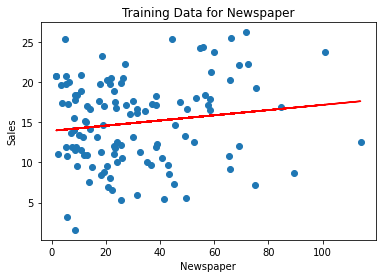

In [14]:
plt.pyplot.scatter(X_train, y_train)
plt.pyplot.plot(X_train, lr.params[0] + lr.params[1] * X_train, "r")
plt.pyplot.xlabel("Newspaper")
plt.pyplot.ylabel("Sales")
plt.pyplot.title("Training Data for Newspaper")
plt.pyplot.show()

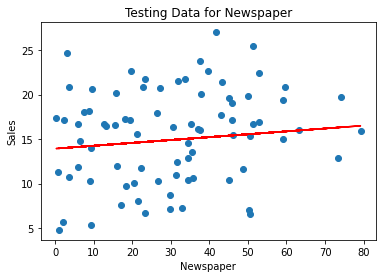

In [15]:
plt.pyplot.scatter(X_test, y_test)
plt.pyplot.plot(X_test, lr.params[0] + lr.params[1] * X_test, "r")
plt.pyplot.xlabel("Newspaper")
plt.pyplot.ylabel("Sales")
plt.pyplot.title("Testing Data for Newspaper")
plt.pyplot.show()